In [ ]:
# auto-reload modules when they have been changed.
%load_ext autoreload
%autoreload 2

[lstm univariate tutorial](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

In [53]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#### Get Shampoo sales data

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv")
# df.to_csv("shampoo.csv", index=False)

In [46]:
df = pd.read_csv("shampoo.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [47]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')


In [48]:
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series.head()

/var/folders/rs/82njg9p15j9ccf6dc3sxp0500000gn/T/ipykernel_4006/326036226.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


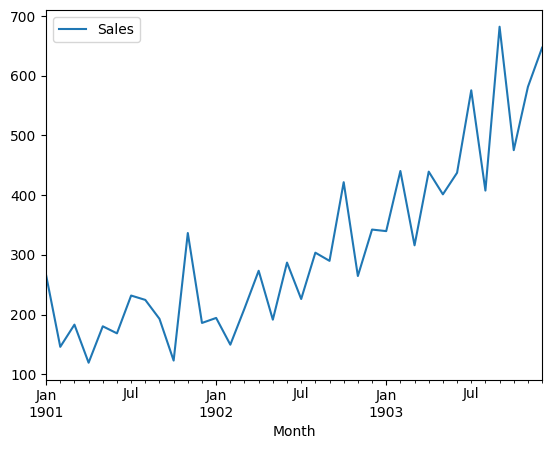

In [49]:
# line plot
series.plot()
plt.show()

- Line plot of series with clear increasing trend
- The sales data in not stationary

#### Train Test Split

In [50]:
X = series.values
train, test = X[:-12], X[-12:]

In [51]:
print(train.shape, test.shape)
print(train)

(24, 1) (12, 1)
[[266. ]
 [145.9]
 [183.1]
 [119.3]
 [180.3]
 [168.5]
 [231.8]
 [224.5]
 [192.8]
 [122.9]
 [336.5]
 [185.9]
 [194.3]
 [149.5]
 [210.1]
 [273.3]
 [191.4]
 [287. ]
 [226. ]
 [303.6]
 [289.9]
 [421.6]
 [264.5]
 [342.3]]


In [11]:
print(test)

[[339.7]
 [440.4]
 [315.9]
 [439.3]
 [401.3]
 [437.4]
 [575.5]
 [407.6]
 [682. ]
 [475.3]
 [581.3]
 [646.9]]


#### Persistence Model Forecast
- Train set - Develop Model
- Test set - Forecast, rolling forecast, walk forward model validation
- Xt = Xt-1

In [52]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat}, expected={obs}')


predicted=[342.3], expected=[339.7]
predicted=[339.7], expected=[440.4]
predicted=[440.4], expected=[315.9]
predicted=[315.9], expected=[439.3]
predicted=[439.3], expected=[401.3]
predicted=[401.3], expected=[437.4]
predicted=[437.4], expected=[575.5]
predicted=[575.5], expected=[407.6]
predicted=[407.6], expected=[682.]
predicted=[682.], expected=[475.3]
predicted=[475.3], expected=[581.3]
predicted=[581.3], expected=[646.9]


#### Evaluate forecasts

In [54]:
#### RMSE Calculation
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 136.761


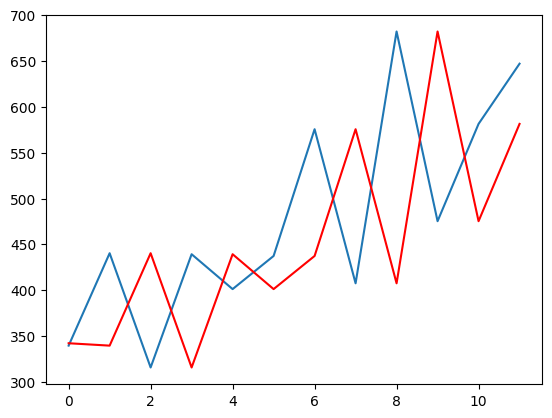

In [55]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

#### LSTM Model Forecasting

#### Transform Time Series to Supervised Learning

- LSTM model expect data in input X and output y format
- We can use previous time step to predict the next time step
- So we need to convert the time series data to supervised learning data

- Supervised learning is foundation for all predictive modeling methods
- The sliding window method for framing a time series dataset and supervised learning problem
- Use sliding window for multivaraite data and 
- multistep forecasting: two or more future time steps are to be predicted

In [56]:
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    print(df.head())
    columns = [df.shift(i) for i in range(1, lag + 1)]
    print(columns[:5])
    columns.append(df)
    print(columns[:5])
    df = pd.concat(columns, axis=1)
    print(df.head())
    df.fillna(0, inplace=True)
    return df

In [57]:
suprvised = timeseries_to_supervised(X, 1)


       0
0  266.0
1  145.9
2  183.1
3  119.3
4  180.3
[        0
0     NaN
1   266.0
2   145.9
3   183.1
4   119.3
5   180.3
6   168.5
7   231.8
8   224.5
9   192.8
10  122.9
11  336.5
12  185.9
13  194.3
14  149.5
15  210.1
16  273.3
17  191.4
18  287.0
19  226.0
20  303.6
21  289.9
22  421.6
23  264.5
24  342.3
25  339.7
26  440.4
27  315.9
28  439.3
29  401.3
30  437.4
31  575.5
32  407.6
33  682.0
34  475.3
35  581.3]
[        0
0     NaN
1   266.0
2   145.9
3   183.1
4   119.3
5   180.3
6   168.5
7   231.8
8   224.5
9   192.8
10  122.9
11  336.5
12  185.9
13  194.3
14  149.5
15  210.1
16  273.3
17  191.4
18  287.0
19  226.0
20  303.6
21  289.9
22  421.6
23  264.5
24  342.3
25  339.7
26  440.4
27  315.9
28  439.3
29  401.3
30  437.4
31  575.5
32  407.6
33  682.0
34  475.3
35  581.3,         0
0   266.0
1   145.9
2   183.1
3   119.3
4   180.3
5   168.5
6   231.8
7   224.5
8   192.8
9   122.9
10  336.5
11  185.9
12  194.3
13  149.5
14  210.1
15  273.3
16  191.4
17  287.0
18  226.0
19

In [58]:
suprvised.head()

,0,0
0,0.0,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


- Shampoo sales dataset is a univariate time series dataset
- We will use previous time step to predict the next time step
- We will use a simple LSTM model for this task
- We will use walk-forward validation for evaluation
#### Transform Time Series to Supervised Learning
- LSTM model expect data in input X and output y format 
- We can use previous time step to predict the next time step
- So we need to convert the time series data to supervised learning data


#### Non stationary to Stationary data

- Shampoo dataset is not stationary
- There is structure in the data set that is dependent on the time
- Stationary data is easier to model
- Trend can be removed from the original data to make it stationary
- Differencing is a common method to remove trend from time series data
- Add back trend to forecasts later to return the predction to the origanal scale and calculate a comparable error score


In [59]:
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = series.squeeze()
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


/var/folders/rs/82njg9p15j9ccf6dc3sxp0500000gn/T/ipykernel_4006/92737062.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


In [60]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [61]:
# invert differenced values
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [62]:
differenced = difference(series, 1)
differenced.head()

/var/folders/rs/82njg9p15j9ccf6dc3sxp0500000gn/T/ipykernel_4006/3756347335.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset[i] - dataset[i - interval]


0   -120.1
1     37.2
2    -63.8
3     61.0
4    -11.8
dtype: float64

In [63]:
# inveted transorm
inverted = list()
for i in range(len(differenced)):
    value = inverse_difference(series, differenced[i], len(series)-i)
    inverted.append(value)
inverted = pd.Series(inverted)

/var/folders/rs/82njg9p15j9ccf6dc3sxp0500000gn/T/ipykernel_4006/3143501477.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return yhat + history[-interval]


In [64]:
inverted.head()

0    145.9
1    183.1
2    119.3
3    180.3
4    168.5
dtype: float64

#### Transform Time Series to Scale

- LSTM expect data to be within the scale of the activation function used by the network
- Default activation function for LSTM is the tanh which outputs values between -1 to 1
- To make experiment fair, the scaling coefficeints (min and max) values must be calculated on the training dataset and applied to scale the test
dataset and any forecasts. 
- use MinMaxScaler class from scikit learn for transforking the dataset to the range -1 to 1

In [ ]:
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
print(scaler)
scaler = scaler.fit(X)
print(scaler)
  = scaler.transform(X)
print(scaled_X[:5])

MinMaxScaler(feature_range=(-1, 1))
MinMaxScaler(feature_range=(-1, 1))
[[-0.47858539]
 [-0.90545584]
 [-0.77323618]
 [-1.        ]
 [-0.7831882 ]]


In [67]:
# invert transform: invert the scale on forecasts to return the values back to th original scale can be interpreted and comparable error score can be calculated

In [68]:
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = pd.Series(inverted_X[:,0])
print(inverted_X[:5])

[[266. ]
 [145.9]
 [183.1]
 [119.3]
 [180.3]]


In [28]:
inverted_series

0     266.0
1     145.9
2     183.1
3     119.3
4     180.3
5     168.5
6     231.8
7     224.5
8     192.8
9     122.9
10    336.5
11    185.9
12    194.3
13    149.5
14    210.1
15    273.3
16    191.4
17    287.0
18    226.0
19    303.6
20    289.9
21    421.6
22    264.5
23    342.3
24    339.7
25    440.4
26    315.9
27    439.3
28    401.3
29    437.4
30    575.5
31    407.6
32    682.0
33    475.3
34    581.3
35    646.9
dtype: float64

#### LSTM Model Development

- LSTM is a type of RNN
- Learn and remember over a long sequenfes and does not rely on a pre -defined window of context like traditional time series methods
- Can learn which parts of the historical data are important to remember and which to forgetdefined window of context like traditional time series methods
- Can learn which parts of the historical data are important to remember and which to forget


- LSTM layer in Keras maintains state between data within one batch. A batch of data is a fixed sized number of rows from the training
dataset that defines how many patterns to process before updating the weights of the network.
- The LSTM layer expects input data in the form of a 3D array with dimensions [samples, timesteps, features].

In [69]:
train

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3]])

In [72]:
train[:, 0:-1]

array([], shape=(24, 0), dtype=float64)

In [31]:
train[:, -1]

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3])

# complete LSTM model implementation

In [74]:
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [90]:
# load dataset
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = series.squeeze()
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 

/var/folders/rs/82njg9p15j9ccf6dc3sxp0500000gn/T/ipykernel_4006/3644865724.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


In [76]:
train

array([[   0. , -120.1],
       [-120.1,   37.2],
       [  37.2,  -63.8],
       [ -63.8,   61. ],
       [  61. ,  -11.8],
       [ -11.8,   63.3],
       [  63.3,   -7.3],
       [  -7.3,  -31.7],
       [ -31.7,  -69.9],
       [ -69.9,  213.6],
       [ 213.6, -150.6],
       [-150.6,    8.4],
       [   8.4,  -44.8],
       [ -44.8,   60.6],
       [  60.6,   63.2],
       [  63.2,  -81.9],
       [ -81.9,   95.6],
       [  95.6,  -61. ],
       [ -61. ,   77.6],
       [  77.6,  -13.7],
       [ -13.7,  131.7],
       [ 131.7, -157.1],
       [-157.1,   77.8]])

In [77]:
test

array([[  77.8,   -2.6],
       [  -2.6,  100.7],
       [ 100.7, -124.5],
       [-124.5,  123.4],
       [ 123.4,  -38. ],
       [ -38. ,   36.1],
       [  36.1,  138.1],
       [ 138.1, -167.9],
       [-167.9,  274.4],
       [ 274.4, -206.7],
       [-206.7,  106. ],
       [ 106. ,   65.6]])

In [78]:
train_scaled

array([[-0.15241435, -0.80037766],
       [-0.80037766,  0.04828702],
       [ 0.04828702, -0.496628  ],
       [-0.496628  ,  0.17669274],
       [ 0.17669274, -0.21607769],
       [-0.21607769,  0.1891017 ],
       [ 0.1891017 , -0.1917993 ],
       [-0.1917993 , -0.32344214],
       [-0.32344214, -0.52953871],
       [-0.52953871,  1.        ],
       [ 1.        , -0.96493121],
       [-0.96493121, -0.10709469],
       [-0.10709469, -0.39411923],
       [-0.39411923,  0.17453466],
       [ 0.17453466,  0.18856218],
       [ 0.18856218, -0.59428109],
       [-0.59428109,  0.3633666 ],
       [ 0.3633666 , -0.48152145],
       [-0.48152145,  0.26625303],
       [ 0.26625303, -0.22632857],
       [-0.22632857,  0.55813326],
       [ 0.55813326, -1.        ],
       [-1.        ,  0.26733207]])

In [39]:
test_scaled

array([[ 0.26733207, -0.16644187],
       [-0.16644187,  0.39088211],
       [ 0.39088211, -0.82411654],
       [-0.82411654,  0.51335312],
       [ 0.51335312, -0.35743189],
       [-0.35743189,  0.04235231],
       [ 0.04235231,  0.59266253],
       [ 0.59266253, -1.05826814],
       [-1.05826814,  1.32802806],
       [ 1.32802806, -1.26760183],
       [-1.26760183,  0.41947667],
       [ 0.41947667,  0.20151066]])

In [40]:
train[:, 0:-1]

array([[   0. ],
       [-120.1],
       [  37.2],
       [ -63.8],
       [  61. ],
       [ -11.8],
       [  63.3],
       [  -7.3],
       [ -31.7],
       [ -69.9],
       [ 213.6],
       [-150.6],
       [   8.4],
       [ -44.8],
       [  60.6],
       [  63.2],
       [ -81.9],
       [  95.6],
       [ -61. ],
       [  77.6],
       [ -13.7],
       [ 131.7],
       [-157.1]])

In [41]:
train[:, -1]

array([-120.1,   37.2,  -63.8,   61. ,  -11.8,   63.3,   -7.3,  -31.7,
        -69.9,  213.6, -150.6,    8.4,  -44.8,   60.6,   63.2,  -81.9,
         95.6,  -61. ,   77.6,  -13.7,  131.7, -157.1,   77.8])

In [79]:
X, y = train[:, 0:-1], train[:, -1]

In [80]:
X

array([[   0. ],
       [-120.1],
       [  37.2],
       [ -63.8],
       [  61. ],
       [ -11.8],
       [  63.3],
       [  -7.3],
       [ -31.7],
       [ -69.9],
       [ 213.6],
       [-150.6],
       [   8.4],
       [ -44.8],
       [  60.6],
       [  63.2],
       [ -81.9],
       [  95.6],
       [ -61. ],
       [  77.6],
       [ -13.7],
       [ 131.7],
       [-157.1]])

In [44]:
X.shape[0]

23

In [45]:
X.shape[1]

1

In [83]:
X.reshape(X.shape[0], 1, X.shape[1])

array([[[   0. ]],

       [[-120.1]],

       [[  37.2]],

       [[ -63.8]],

       [[  61. ]],

       [[ -11.8]],

       [[  63.3]],

       [[  -7.3]],

       [[ -31.7]],

       [[ -69.9]],

       [[ 213.6]],

       [[-150.6]],

       [[   8.4]],

       [[ -44.8]],

       [[  60.6]],

       [[  63.2]],

       [[ -81.9]],

       [[  95.6]],

       [[ -61. ]],

       [[  77.6]],

       [[ -13.7]],

       [[ 131.7]],

       [[-157.1]]])

In [47]:
X = X.reshape(X.shape[0], 1, X.shape[1])

In [48]:
X

array([[[   0. ]],

       [[-120.1]],

       [[  37.2]],

       [[ -63.8]],

       [[  61. ]],

       [[ -11.8]],

       [[  63.3]],

       [[  -7.3]],

       [[ -31.7]],

       [[ -69.9]],

       [[ 213.6]],

       [[-150.6]],

       [[   8.4]],

       [[ -44.8]],

       [[  60.6]],

       [[  63.2]],

       [[ -81.9]],

       [[  95.6]],

       [[ -61. ]],

       [[  77.6]],

       [[ -13.7]],

       [[ 131.7]],

       [[-157.1]]])

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [91]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)

ValueError: Unrecognized keyword arguments passed to LSTM: {'batch_input_shape': (1, 1, 1)}

In [51]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

1/1 [==============================] - 0s 8ms/step
Month=1, Predicted=344.022621, Expected=339.700000
1/1 [==============================] - 0s 8ms/step
Month=2, Predicted=310.762053, Expected=440.400000
1/1 [==============================] - 0s 8ms/step
Month=3, Predicted=370.447008, Expected=315.900000
1/1 [==============================] - 0s 8ms/step
Month=4, Predicted=442.398465, Expected=439.300000
1/1 [==============================] - 0s 8ms/step
Month=5, Predicted=455.917996, Expected=401.300000
1/1 [==============================] - 0s 8ms/step
Month=6, Predicted=233.059545, Expected=437.400000
1/1 [==============================] - 0s 9ms/step
Month=7, Predicted=474.240056, Expected=575.500000
1/1 [==============================] - 0s 13ms/step
Month=8, Predicted=473.746198, Expected=407.600000
1/1 [==============================] - 0s 8ms/step
Month=9, Predicted=466.589560, Expected=682.000000
1/1 [==============================] - 0s 9ms/step
Month=10, Predicted=499.900731

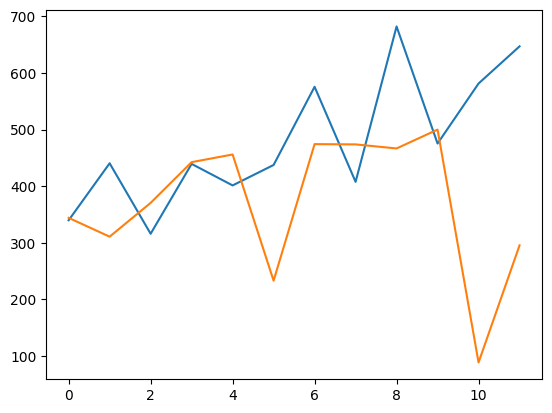

In [52]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()